In [134]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import newton

In [52]:
data = np.loadtxt('data/Kennlinie_Sonde_130V.csv', skiprows=1)
U = -data[:,0]
I = data[:,1]

In [65]:
#window_size = 40
#smoothed_I = np.convolve(I, np.ones(window_size)/window_size, mode='same')
i_floating_pot = abs(I).argmin()

floating_region_start = i_floating_pot - 5
floating_region_end = i_floating_pot + 5

floating_voltage = U[floating_region_start:floating_region_end]
floating_current = I[floating_region_start:floating_region_end]

slope, intercept = np.polyfit(floating_voltage, floating_current, 1)
floating_potential = - intercept / slope



slope, intercept = np.polyfit(U[0 : i_floating_pot], I[0 : i_floating_pot], 1)
Ion_sat_current = intercept + slope * (floating_potential -3.5)

print(Ion_sat_current)

-0.11613416721744906


[Text(0.5, 0, 'U/V'), Text(0, 0.5, '$I / \\mathrm{\\mu A}$')]

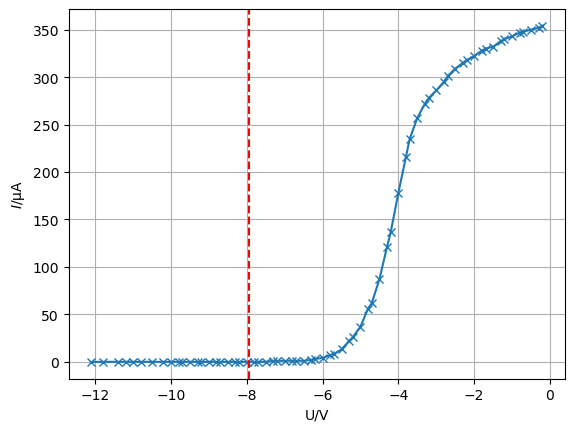

In [66]:
fig, ax = plt.subplots()
ax.plot(U, I, marker = 'x')
ax.axvline(x=floating_potential, color='r', linestyle='--', label='Plasma Potential')
#ax.axhline(y=Ion_sat_current, color='b', linestyle='--', label='Ion SaturationCurrent')
ax.grid()
ax.set(xlabel="U/V", ylabel="$I / \\mathrm{\\mu A}$")
#ax.set(xlim=[-10, -5.5],  ylim=[-0.5, 10])

In [67]:
I_e = I - Ion_sat_current

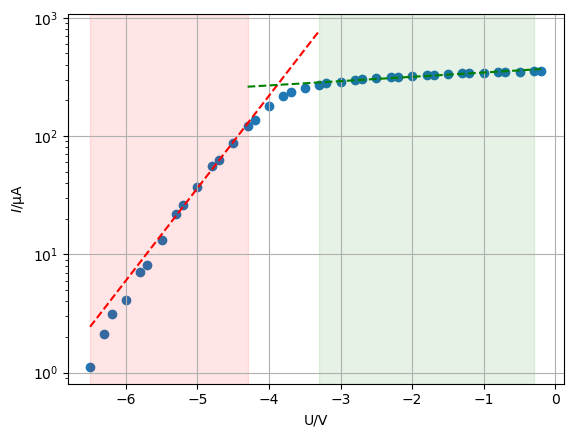

In [167]:
def exponential_func(x, a, b):
    return  a * np.exp(-b * x)
fit_area1 = [29,42]
fit_area2 = [48, 66]
params1, params_covariance1 = curve_fit(exponential_func, U[fit_area1[0]:fit_area1[1]], I_e[fit_area1[0]:fit_area1[1]], maxfev=100000)
params2, params_covariance2 = curve_fit(exponential_func, U[fit_area2[0]:fit_area2[1]], I_e[fit_area2[0]:fit_area2[1]], maxfev=100000)
intersection = newton(lambda x: exponential_func(x, *params1) - exponential_func(x, *params2), -4)

fig2, ax2 = plt.subplots()
ax2.scatter(U[29:], I_e[29:])


plt.axvspan(U[fit_area1[0]], U[fit_area1[1]], color='red', alpha=0.1)
plt.axvspan(U[fit_area2[0]], U[fit_area2[1]], color='green', alpha=0.1)

us1 = np.linspace(U[29], U[fit_area2[0]], 1000)
us2 = np.linspace(U[fit_area1[1]], max(U), 1000)
ax2.plot(us1, exponential_func(us1, *params1), 'r--')
ax2.plot(us2, exponential_func(us2, *params2), 'g--')

ax2.set_yscale('log')
ax2.set(xlabel="U/V", ylabel="$I / \\mathrm{\\mu A}$")# ylim=[1, 400])

ax2.axhline(intersection)
ax2.grid()

fig2.savefig('out/manuell_expfit')

-4.0


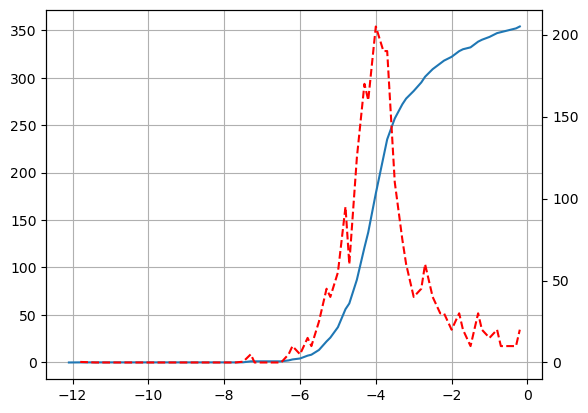

In [181]:
dU = np.diff(U)
dI = np.diff(I)
dI_dU = dI / dU


fig3, ax3 = plt.subplots()
ax4 = ax3.twinx()

ax3.grid(True)
ax3.set_axisbelow(True)
ax3.plot(U, I)
ax4.plot(U[1:], dI_dU, 'r--')

print(U[1+np.argmax(dI_dU)])
